(821, 616, 3)


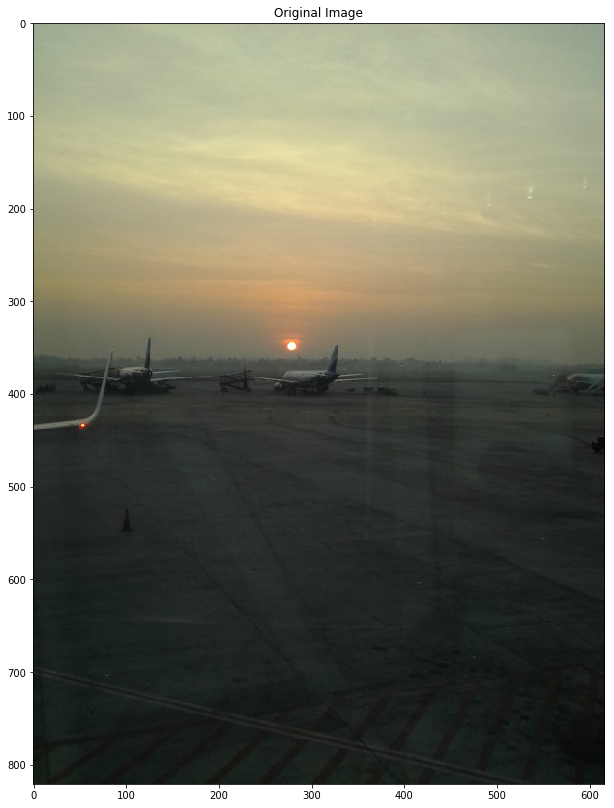

In [9]:
from skimage import transform, util, filters, color
from skimage.io import imread
from matplotlib import pyplot as pylab

image = imread('../images/aero.jpg')
print(image.shape) # (821, 616, 3)
pylab.figure(figsize=(20,14)), pylab.title('Original Image')
pylab.imshow(image)
pylab.show()

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(821, 416, 3)


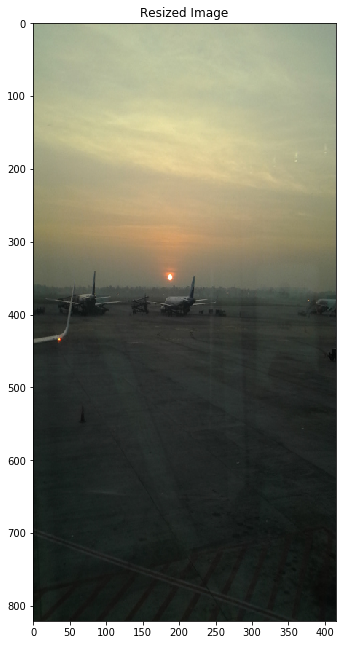

(<matplotlib.image.AxesImage at 0x1a54d3ea860>, None)

In [3]:
size = (image.shape[0], image.shape[1] - 200)
resized = transform.resize(image, size, mode='reflect')
print(resized.shape) # (821, 416, 3)

pylab.figure(figsize=(20,11)), pylab.title('Resized Image')
pylab.imshow(resized), pylab.show()

In [ ]:
영상의 크기 조정 - seam_carve() 함수 사용

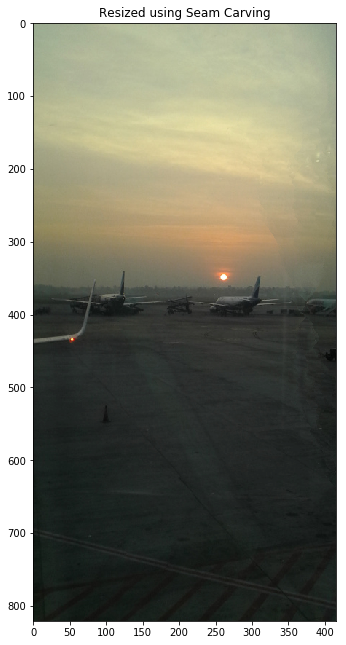

In [4]:
image = util.img_as_float(image)
energy_image = filters.sobel(color.rgb2gray(image))
out = transform.seam_carve(image, energy_image, 'vertical', 200)

pylab.figure(figsize=(20,11)), pylab.imshow(out)
pylab.title('Resized using Seam Carving')
pylab.show()

(720, 534, 3)


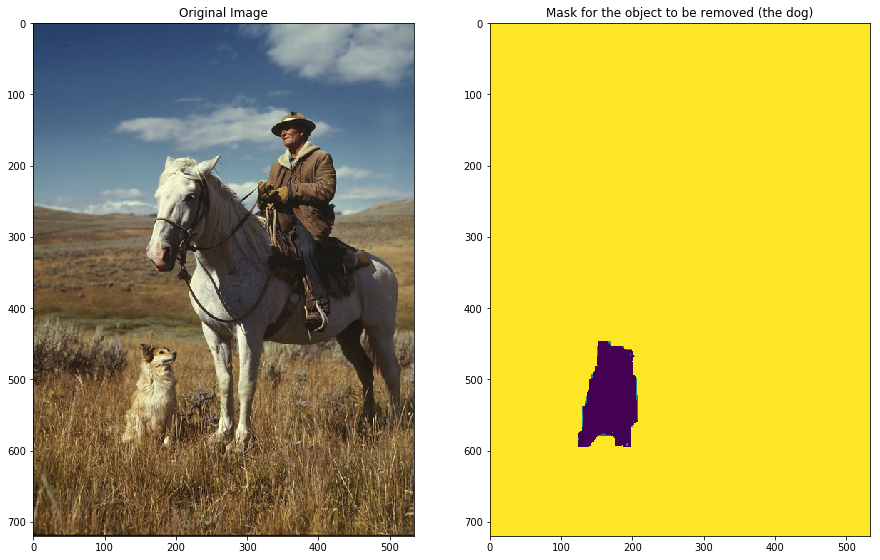

In [12]:
image = imread('../images/man.jpg')
mask_img = color.rgb2gray(imread('../images/man_mask.jpg'))
print(image.shape)

pylab.figure(figsize=(15,10))
pylab.subplot(121), pylab.imshow(image), pylab.title('Original Image')
pylab.subplot(122), pylab.imshow(mask_img)
pylab.title('Mask for the object to be removed (the dog)')
pylab.show()

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


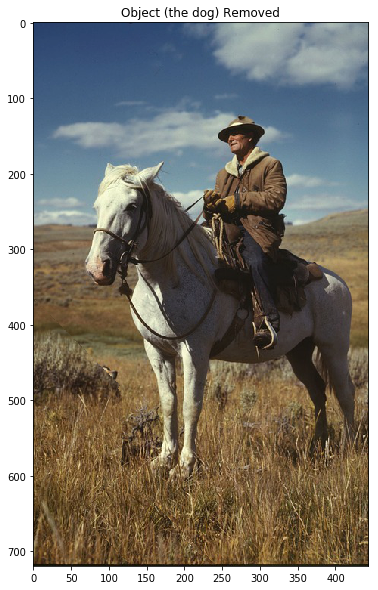

In [13]:
pylab.figure(figsize=(10,10))
pylab.title('Object (the dog) Removed')
out = transform.seam_carve(image, mask_img, 'vertical', 90)
resized = transform.resize(image, out.shape, mode='reflect')

pylab.imshow(out)
pylab.show()

In [15]:
import cv2
print(cv2.__version__) # OpenCV 버전 확인- 3.0 버전 이상 필요

# 원본 영상, 목적 영상, 마스크 영상 읽기
src = cv2.imread("../images/bird.jpg")
dst = cv2.imread("../images/sea.jpg")
src_mask = cv2.imread("../images/birds_mask.jpg")
print(src.shape, dst.shape, src_mask.shape)
# (480, 698, 3) (576, 768, 3) (480, 698, 3)

center = (450,165) # 새가 놓일 중심 위치
# 이음매 없는 복제
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)
cv2.imwrite("sea_bird.jpg", output) # 결과 영상 저장

3.3.1
(480, 698, 3) (576, 768, 3) (480, 698, 3)


True

[0. 1.]


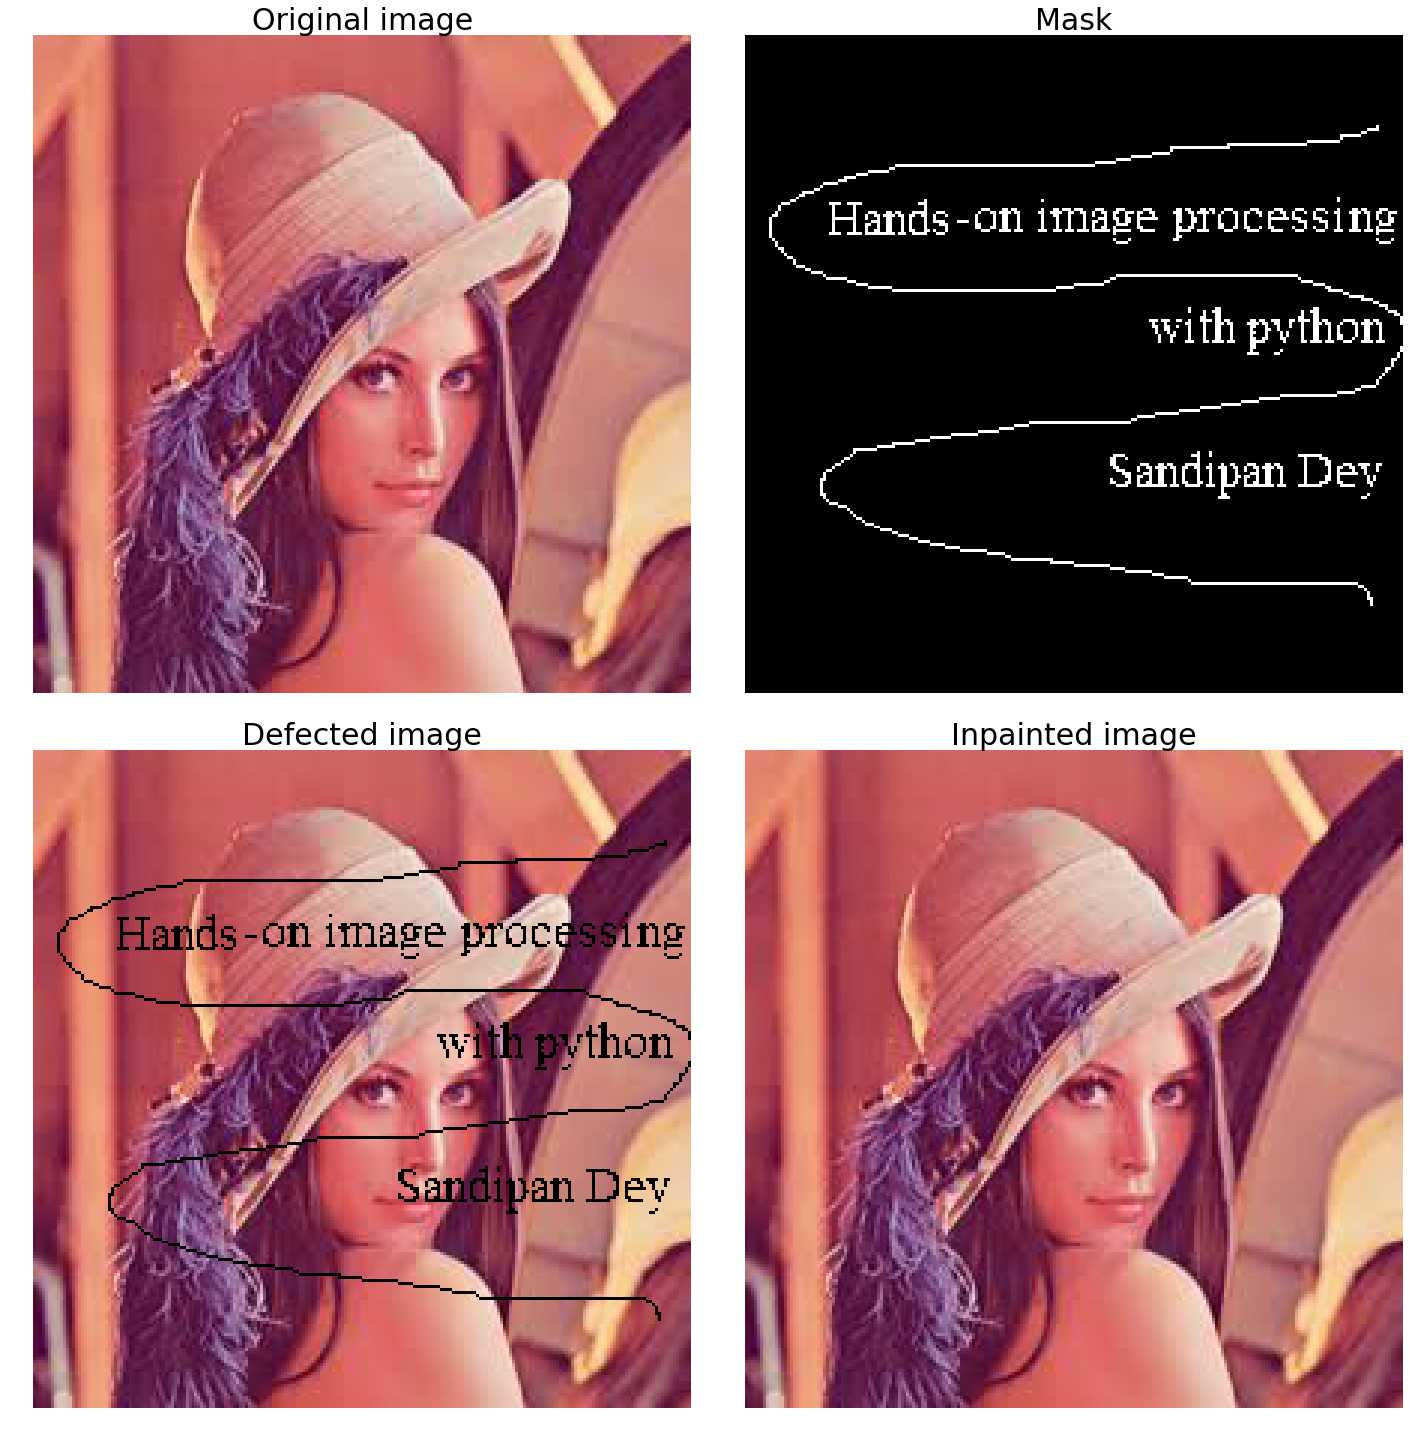

In [4]:
import numpy as np
import matplotlib.pyplot as pylab
from skimage import img_as_float
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.restoration import inpaint

image_orig = img_as_float(imread('../images/lena.jpg'))
mask = rgb2gray(imread('../images/lena_scratch_mask.jpg')) # 마스크 영상 읽기
mask[mask > 0.5] = 1
mask[mask <= 0.5] = 0
print(np.unique(mask))

# 마스크 원소가 1인 위치에 검은색 표시
image_defect = image_orig.copy() # 영상 복사
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0 # 검은색
    
image_result = inpaint.inpaint_biharmonic(image_defect, mask, multichannel=True)

fig, axes = pylab.subplots(ncols=2, nrows=2, figsize=(20,20))
ax = axes.ravel()
ax[0].set_title('Original image', size=30), ax[0].imshow(image_orig)
ax[1].set_title('Mask', size=30), ax[1].imshow(mask, cmap='gray')
ax[2].set_title('Defected image', size=30), ax[2].imshow(image_defect)
ax[3].set_title('Inpainted image', size=30), ax[3].imshow(image_result)

for a in ax:
    a.axis('off')
fig.tight_layout()
pylab.show()

In [ ]:
전체 변이 잡음제거

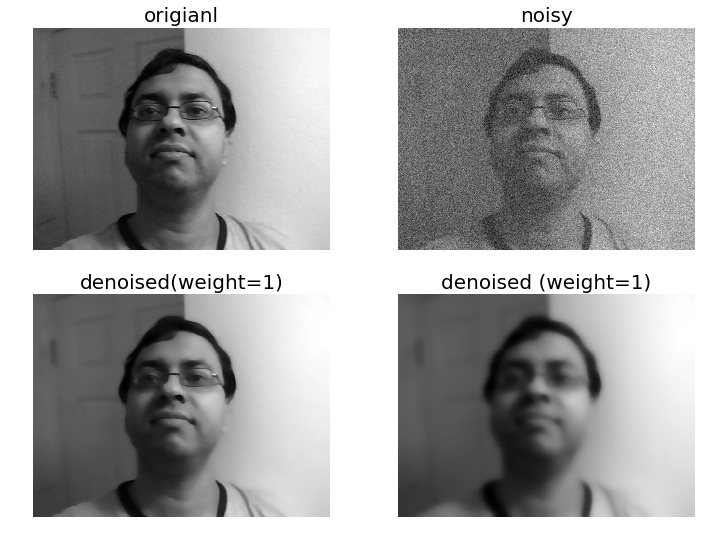

In [2]:
from skimage import io, color, data, img_as_float
from skimage.restoration import denoise_tv_chambolle

image = color.rgb2gray(io.imread('../images/me12.jpg')) # 명암도 영상 변환
noisy_img = image + 0.5 * image.std() * np.random.randn(*image.shape)

# 잡음제거(denoise) 수행
denoised_img1 = denoise_tv_chambolle(image, weight=0.1)
denoised_img2 = denoise_tv_chambolle(image, weight=1 )
# 결과 영상 리스트
images = [image, noisy_img, denoised_img1, denoised_img2]
titles = 'origianl', 'noisy', 'denoised(weight=1)', 'denoised (weight=1)'

pylab.figure(figsize=(12, 9))
for i, img in enumerate(images):
    pylab.subplot(2, 2, i+1), pylab.imshow(img, cmap='gray')
    pylab.title(titles[i], size=20), pylab.axis('off')
pylab.show()

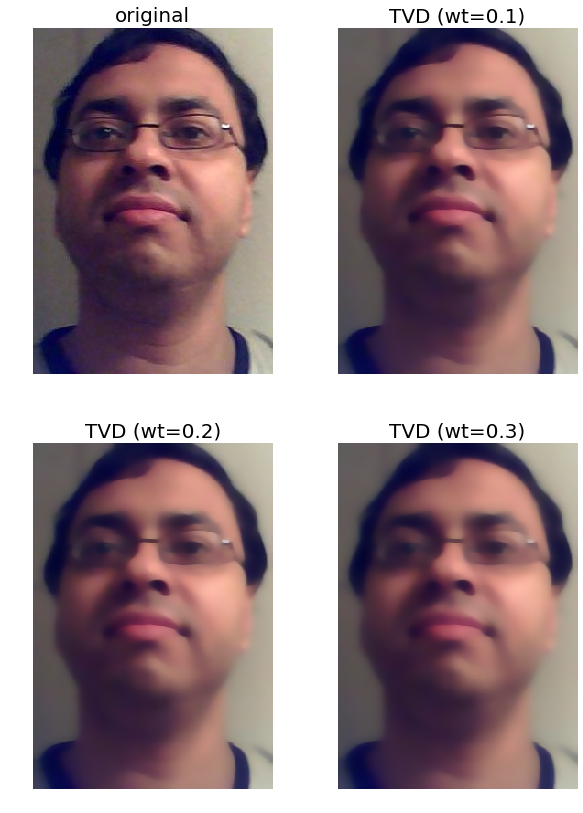

In [6]:
image = io.imread('../images/me18.jpg') # 컬러 영상 로드
denoised_img1 = denoise_tv_chambolle(image, weight=0.1, multichannel=True)
denoised_img2 = denoise_tv_chambolle(image, weight=0.2, multichannel=True)
denoised_img3 = denoise_tv_chambolle(image, weight=0.3, multichannel=True)

images = [image, denoised_img1, denoised_img2, denoised_img3]
titles = ['original', 'TVD (wt=0.1)', 'TVD (wt=0.2)', 'TVD (wt=0.3)']

pylab.figure(figsize=(10,14))
for i, img in enumerate(images):
    pylab.subplot(2,2,i+1), pylab.imshow(img)
    pylab.title(titles[i], size=20), pylab.axis('off')
pylab.show()